In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

### Loading The data as a dataframe 

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [78]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [90]:
data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [91]:
data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [92]:
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [93]:
data['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [94]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [88]:
data[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']].value_counts()

Attrition  BusinessTravel  Department              EducationField    Gender  JobRole                MaritalStatus  Over18  OverTime
No         Travel_Rarely   Research & Development  Life Sciences     Male    Research Scientist     Married        Y       No          19
                                                   Medical           Male    Laboratory Technician  Married        Y       No          17
                           Sales                   Marketing         Male    Sales Executive        Married        Y       No          15
                           Research & Development  Life Sciences     Male    Laboratory Technician  Married        Y       No          15
                                                                             Research Scientist     Single         Y       No          14
                                                                                                                                       ..
                           Human Resourc

In [89]:
Obj = data.select_dtypes(include='object').columns
print(Obj)   

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Checking for missing values

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

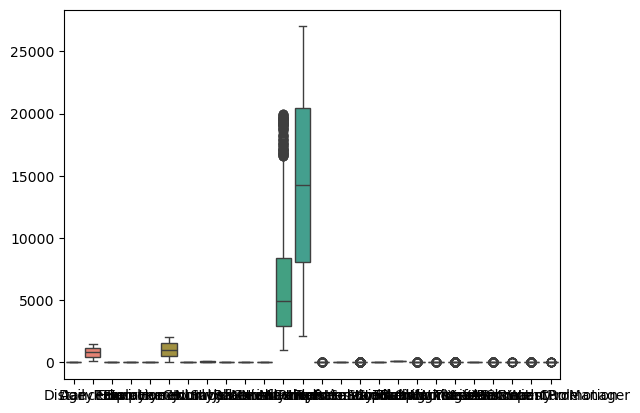

In [6]:
sns.boxplot(data=data)

In [7]:
df = data.copy()

### Handling Outliers

In [8]:
q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)
print(lb,ub)

-5291.0 16581.0


In [9]:
df.loc[df['MonthlyIncome']>ub,'MonthlyIncome' ] = ub

<Axes: >

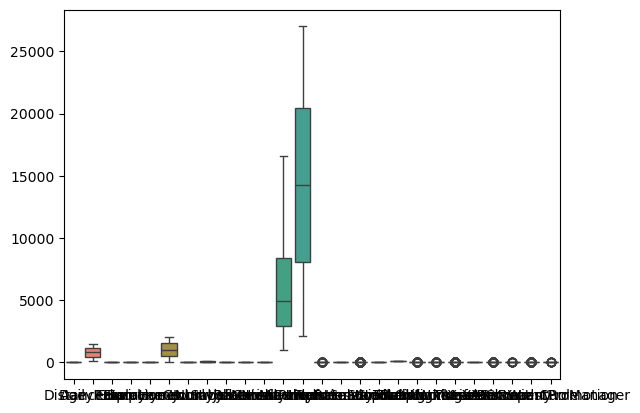

In [10]:
sns.boxplot(data = df)

In [11]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [12]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [13]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [14]:
data_train = df.copy()

### Preprocessing the Dataset by Encoding the String data

In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler() 

In [16]:
col_list = df.select_dtypes(include='object').columns
for col in col_list:
    df[col] = encoder.fit_transform(df[col].astype(object))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [96]:
df['MaritalStatus'].value_counts()

MaritalStatus
1    673
2    470
0    327
Name: count, dtype: int64

In [97]:
df['Gender'].value_counts()

Gender
1    882
0    588
Name: count, dtype: int64

In [98]:
df['Department'].value_counts()

Department
1    961
2    446
0     63
Name: count, dtype: int64

In [99]:
df['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

In [100]:
df['EducationField'].value_counts()

EducationField
1    606
3    464
2    159
5    132
4     82
0     27
Name: count, dtype: int64

In [17]:
cols = list(df.columns)
a, b = cols.index('Attrition'), cols.index('YearsWithCurrManager')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   YearsWithCurrManager      1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [19]:
df.head()

,Age,YearsWithCurrManager,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,41,5,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,1
1,49,7,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,0
2,37,0,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,1
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,2,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,0


### Running Basic statistical Functions to determine the Correlation of the features with the target

In [22]:
df.corr()

,Age,YearsWithCurrManager,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
Age,1.000000,0.202089,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,-0.159205
YearsWithCurrManager,0.202089,1.000000,-0.022636,-0.026363,0.034282,0.014406,0.069065,-0.004130,NaN,-0.009197,...,-0.000867,NaN,0.024698,0.459188,-0.004096,0.002759,0.769212,0.714365,0.510224,-0.156199
BusinessTravel,0.024751,-0.022636,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,0.000074
DailyRate,0.010661,-0.026363,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.056652
Department,-0.031882,0.034282,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.063991
DistanceFromHome,-0.001686,0.014406,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.077924
Education,0.208034,0.069065,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,-0.031373
EducationField,-0.040873,-0.004130,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,0.026846
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.009197,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.010577


In [23]:
df['Over18'].value_counts()

Over18
0    1470
Name: count, dtype: int64

### Dropping Uncorrelated Features

In [24]:
df.drop('EmployeeCount', axis=1,inplace=True)
df.drop('Over18', axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

In [25]:
df.corr()

,Age,YearsWithCurrManager,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
Age,1.000000,0.202089,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,-0.159205
YearsWithCurrManager,0.202089,1.000000,-0.022636,-0.026363,0.034282,0.014406,0.069065,-0.004130,-0.009197,-0.004999,...,0.022827,-0.000867,0.024698,0.459188,-0.004096,0.002759,0.769212,0.714365,0.510224,-0.156199
BusinessTravel,0.024751,-0.022636,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,0.000074
DailyRate,0.010661,-0.026363,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.056652
Department,-0.031882,0.034282,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.063991
DistanceFromHome,-0.001686,0.014406,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.077924
Education,0.208034,0.069065,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,-0.031373
EducationField,-0.040873,-0.004130,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,0.026846
EmployeeNumber,-0.010145,-0.009197,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.010577
EnvironmentSatisfaction,0.010146,-0.004999,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.103369


In [26]:
df_retained = df.copy()

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Features Selection

In [28]:
from sklearn.feature_selection import chi2,f_classif,SelectKBest,SelectPercentile,mutual_info_classif
Best = SelectKBest(score_func=f_classif, k=10)

In [29]:
Parse = Best.fit_transform(X,y)

In [30]:
Parse.shape

(1470, 10)

In [31]:
Best.get_feature_names_out()

array(['Age', 'YearsWithCurrManager', 'JobLevel', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole'],
      dtype=object)

In [32]:
Best.get_params()

{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [33]:
New_df = df[['Age', 'YearsWithCurrManager', 'JobLevel', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole','Attrition']]

In [34]:
New_df.head()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
0,41,5,2,2,5993,1,0,8,6,4,1
1,49,7,2,1,5130,0,1,10,10,7,0
2,37,0,1,2,2090,1,0,7,0,0,1
3,33,0,1,1,2909,1,0,8,8,7,0
4,27,2,1,1,3468,0,1,6,2,2,0


In [35]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1470 non-null   int64
 1   YearsWithCurrManager  1470 non-null   int64
 2   JobLevel              1470 non-null   int64
 3   MaritalStatus         1470 non-null   int32
 4   MonthlyIncome         1470 non-null   int64
 5   OverTime              1470 non-null   int32
 6   StockOptionLevel      1470 non-null   int64
 7   TotalWorkingYears     1470 non-null   int64
 8   YearsAtCompany        1470 non-null   int64
 9   YearsInCurrentRole    1470 non-null   int64
 10  Attrition             1470 non-null   int32
dtypes: int32(3), int64(8)
memory usage: 109.2 KB


### Scaling & Model Selection for Unsupervised Learning Model Training

In [36]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [37]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(New_df)

### KMeans Model Training

In [38]:
wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i, random_state=45)
    kmeans.fit(df_scaled)
    print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
print(wcss)

C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16170.000000000005


C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11945.171854801843


C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10433.698743311072


C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9174.017383971654
[16170.000000000005, 11945.171854801843, 10433.698743311072, 9174.017383971654]


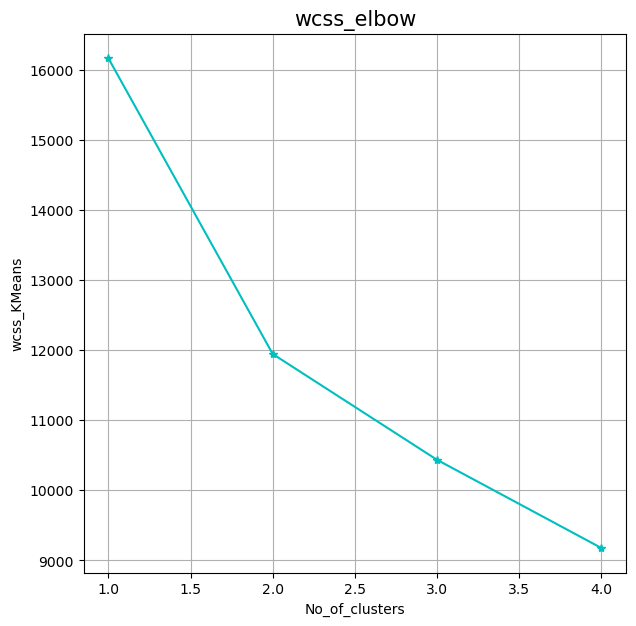

In [39]:
plt.figure(figsize=(7,7))
plt.plot(range(1,5), wcss, marker = '*', color = 'c')
plt.title('wcss_elbow', fontsize = 15)
plt.xlabel('No_of_clusters')
plt.ylabel('wcss_KMeans')
plt.grid()
plt.show()

In [70]:
kmeans = KMeans(n_clusters=2,random_state=42)
label = kmeans.fit_predict(df_scaled)

C:\Users\USER\anaconda3\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
New_df['K_Group'] = label

C:\Users\USER\AppData\Local\Temp\ipykernel_11356\1295793406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['K_Group'] = label


In [72]:
New_df.head()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition,K_Group,Group
0,41,5,2,2,5993,1,0,8,6,4,1,1,1
1,49,7,2,1,5130,0,1,10,10,7,0,0,0
2,37,0,1,2,2090,1,0,7,0,0,1,1,1
3,33,0,1,1,2909,1,0,8,8,7,0,1,1
4,27,2,1,1,3468,0,1,6,2,2,0,1,1


In [43]:
New_df['K_Group'].value_counts()

K_Group
1    1005
0     465
Name: count, dtype: int64

### Agglomerative Model Training

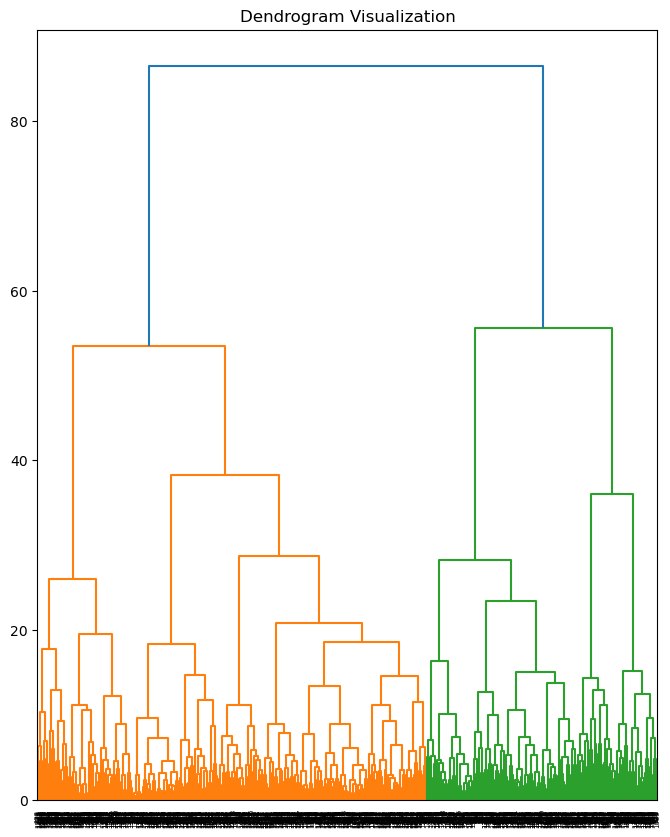

In [44]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,10))
plt.title('Dendrogram Visualization')
dendro = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

In [45]:
silhouette_scores=[]
k = [2,3,4,5]
for i in range(2,6):
    agi = AgglomerativeClustering(n_clusters=i)
    silhouette_scores.append(silhouette_score(df_scaled,agi.fit_predict(df_scaled)))
print(silhouette_scores)

[0.22159295251415168, 0.1785041611991476, 0.20137495107498826, 0.15566612006483538]


In [46]:
# ag2 = AgglomerativeClustering(n_clusters=2)
# ag3 = AgglomerativeClustering(n_clusters=3)
# ag4 = AgglomerativeClustering(n_clusters=4)
# ag5 = AgglomerativeClustering(n_clusters=5)

In [47]:
# k = [2,3,4,5]
# silhouette_scores=[]
# silhouette_scores.append(silhouette_score(df_scaled,ag2.fit_predict(df_scaled)))
# silhouette_scores.append(silhouette_score(df_scaled,ag3.fit_predict(df_scaled)))
# silhouette_scores.append(silhouette_score(df_scaled,ag4.fit_predict(df_scaled)))
# silhouette_scores.append(silhouette_score(df_scaled,ag5.fit_predict(df_scaled)))

In [48]:
# print(silhouette_scores)

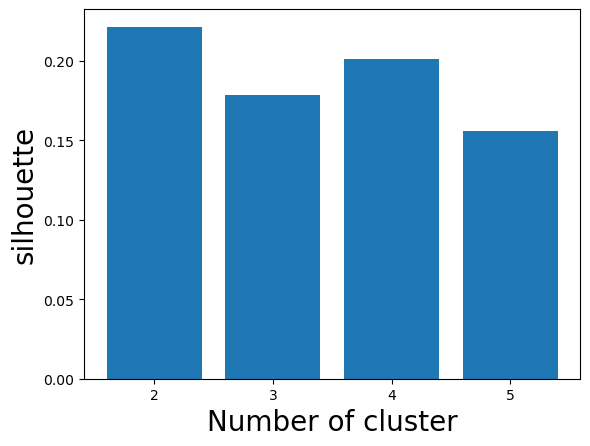

In [49]:
# Goal is to determine the highest silhouette score
import matplotlib.ticker as mticker
plt.bar(k,silhouette_scores)
plt.xlabel('Number of cluster', fontsize=20)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('silhouette', fontsize = 20)
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

In [50]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(df_scaled)

AgglomerativeClustering()

In [51]:
Group = cluster.labels_

In [52]:
print(Group)

[1 0 1 ... 1 0 1]


In [53]:
New_df['Group'] = Group

C:\Users\USER\AppData\Local\Temp\ipykernel_11356\3518336898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['Group'] = Group


In [54]:
New_df.head()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition,K_Group,Group
0,41,5,2,2,5993,1,0,8,6,4,1,1,1
1,49,7,2,1,5130,0,1,10,10,7,0,0,0
2,37,0,1,2,2090,1,0,7,0,0,1,1,1
3,33,0,1,1,2909,1,0,8,8,7,0,1,1
4,27,2,1,1,3468,0,1,6,2,2,0,1,1


In [55]:
New_df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [56]:
New_df['Group'].value_counts()

Group
1    923
0    547
Name: count, dtype: int64

### Feature Engineering for Precise Analysis

In [57]:
New_Group = New_df['Group']
data_train['Group'] = New_Group
data_train['K_Group'] = label

### Visualization of Certain features for Informed Analysis of performance of both KMeans & Agglomerative model predictions

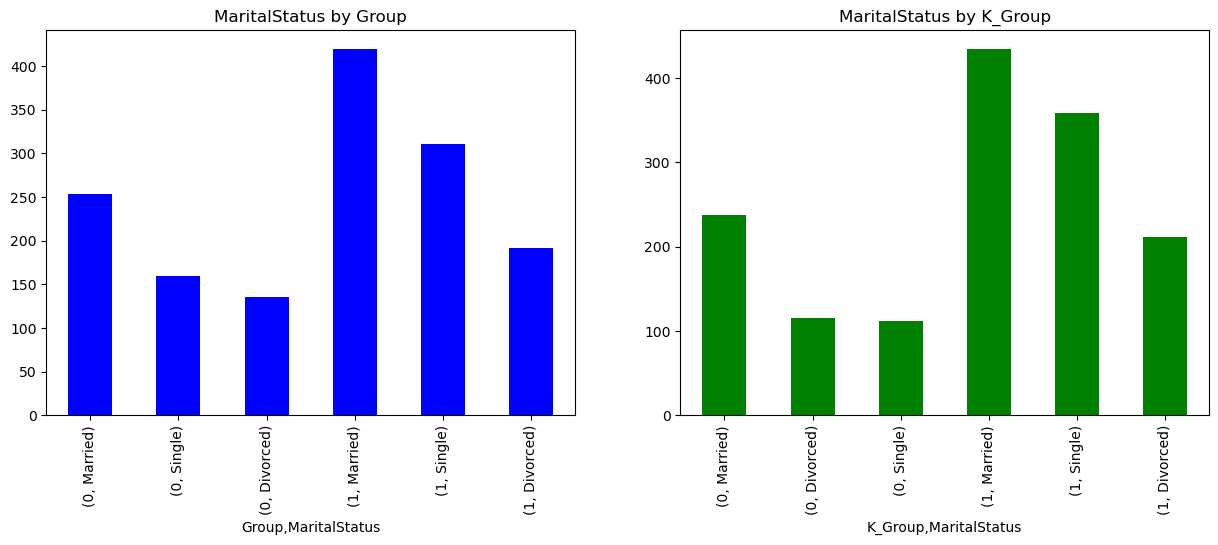

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
KAY = data_train.groupby('Group')['MaritalStatus'].value_counts()
KAY.plot(kind = 'bar', color = 'b')
plt.title('MaritalStatus by Group')

plt.subplot(1,2,2)
RAY = data_train.groupby('K_Group')['MaritalStatus'].value_counts()
RAY.plot(kind = 'bar', color = 'g')
plt.title('MaritalStatus by K_Group')
plt.savefig('MaritalStatus by Group & MaritalStatus by K_Group.png')

plt.show()

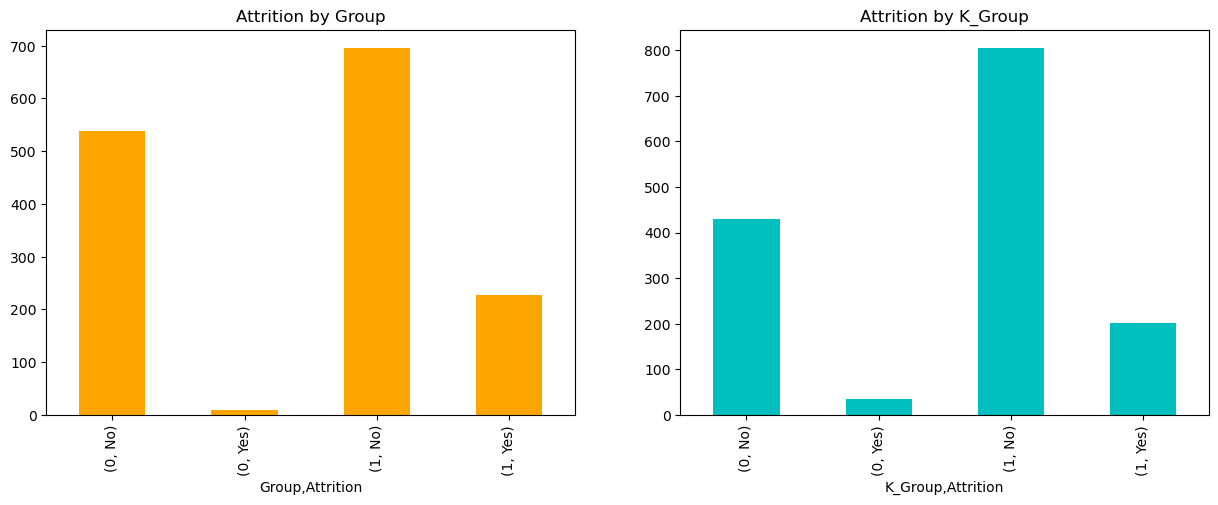

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
PAY = data_train.groupby('Group')['Attrition'].value_counts()
PAY.plot(kind = 'bar', color = 'orange')
plt.title('Attrition by Group')

plt.subplot(1,2,2)
SAY = data_train.groupby('K_Group')['Attrition'].value_counts()
SAY.plot(kind = 'bar', color = 'c')
plt.title('Attrition by K_Group')
plt.savefig('Attrition by Group & Attrition by K_Group.png')

plt.show()

In [62]:
Kmeans_vs_Agglomerative.to_csv('Kmeans_Agglomerative.csv', index=False)

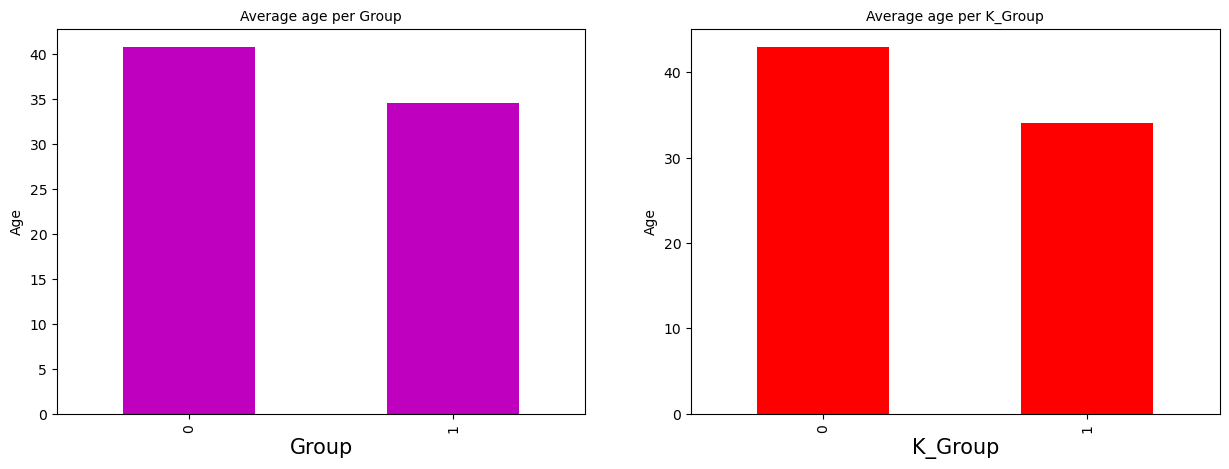

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Average age per Group', fontsize = 10)
Sen=data_train.groupby('Group')['Age'].mean()
Sen.plot(kind = 'bar', color = 'm')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel('Group', fontsize= 15)
plt.ylabel('Age', fontsize = 10)

plt.subplot(1,2,2)
plt.title('Average age per K_Group', fontsize = 10)
Ren=data_train.groupby('K_Group')['Age'].mean()
Ren.plot(kind = 'bar', color = 'r')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel('K_Group', fontsize= 15)
plt.ylabel('Age', fontsize = 10)
plt.savefig('Average age per Group & Average age per K_Group.png')

plt.show()

In [65]:
data_train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Group,K_Group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,1


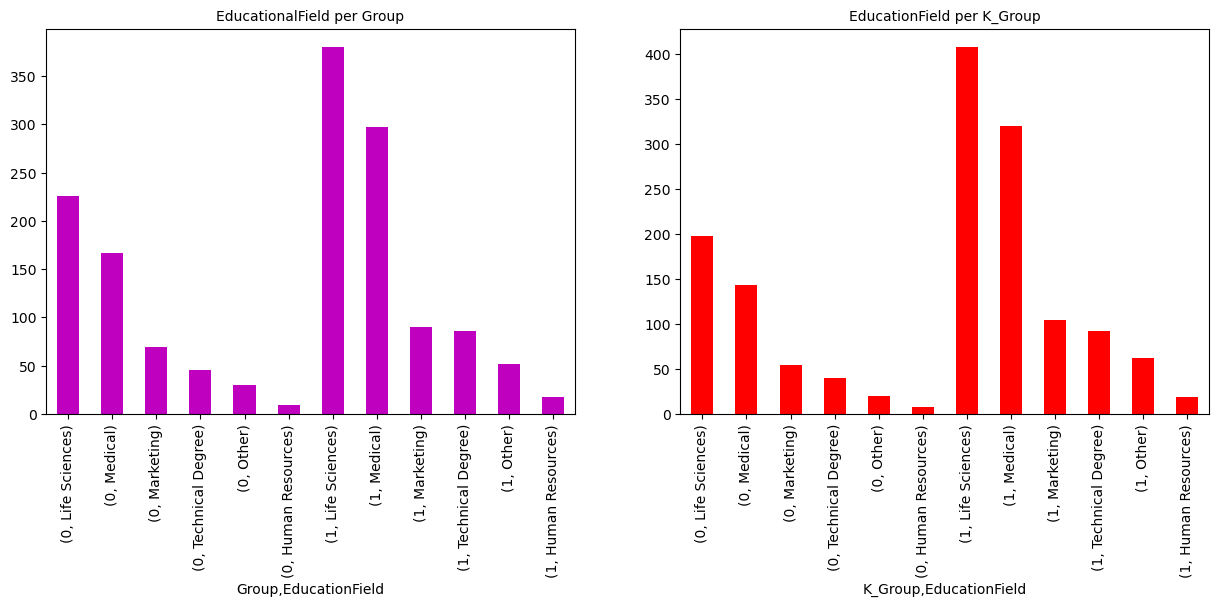

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('EducationalField per Group', fontsize = 10)
Sen=data_train.groupby('Group')['EducationField'].value_counts()
Sen.plot(kind = 'bar', color = 'm')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.xlabel('EducationField', fontsize= 15)
# plt.ylabel('Age', fontsize = 10)

plt.subplot(1,2,2)
plt.title('EducationField per K_Group', fontsize = 10)
Ren=data_train.groupby('K_Group')['EducationField'].value_counts()
Ren.plot(kind = 'bar', color = 'r')
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
# plt.xlabel('K_Group', fontsize= 15)
# plt.ylabel('EducationField', fontsize = 10)
plt.savefig('EducationalField per Group & EducationalField per K_Group.png')

plt.show()

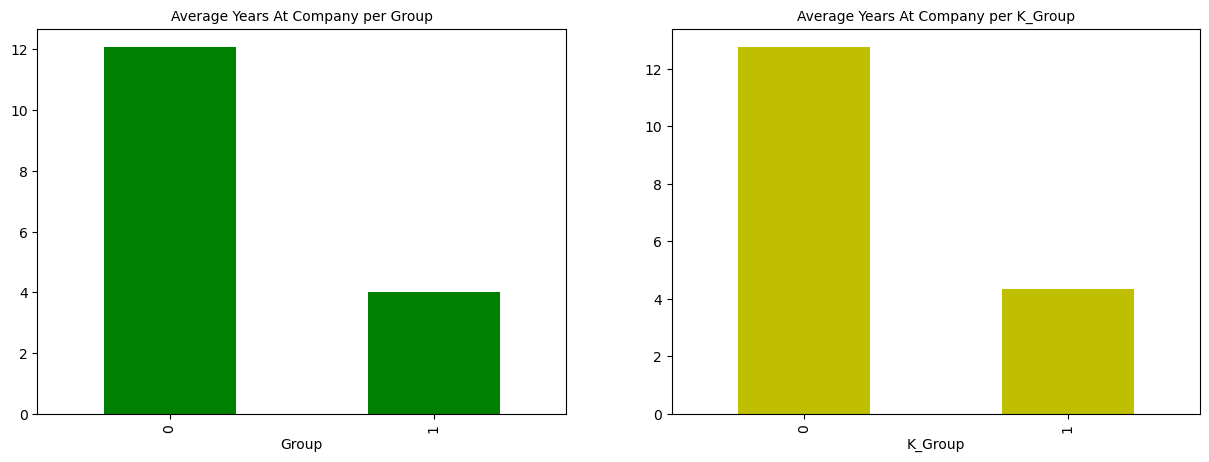

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Average Years At Company per Group', fontsize = 10)
Bat = data_train.groupby('Group')['YearsAtCompany'].mean()
Bat.plot(kind = 'bar', color = 'g')

plt.subplot(1,2,2)
plt.title('Average Years At Company per K_Group', fontsize = 10)
Cat = data_train.groupby('K_Group')['YearsAtCompany'].mean()
Cat.plot(kind = 'bar', color = 'y')
plt.savefig('Average Years At Company per Group & Average Years At Company per K_Group.png')

plt.show()

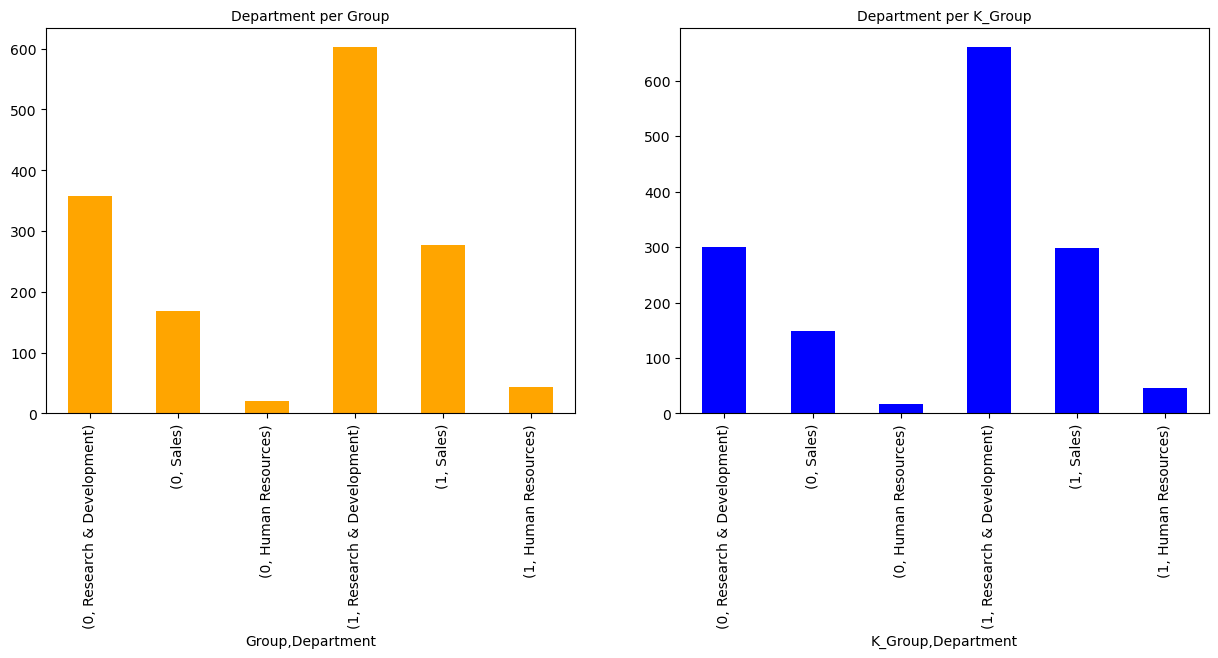

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Department per Group', fontsize = 10)
Bat = data_train.groupby('Group')['Department'].value_counts()
Bat.plot(kind = 'bar', color = 'orange')

plt.subplot(1,2,2)
plt.title('Department per K_Group', fontsize = 10)
Cat = data_train.groupby('K_Group')['Department'].value_counts()
Cat.plot(kind = 'bar', color = 'b')
plt.savefig('Department per Group & Department per K_Group.png')

plt.show()

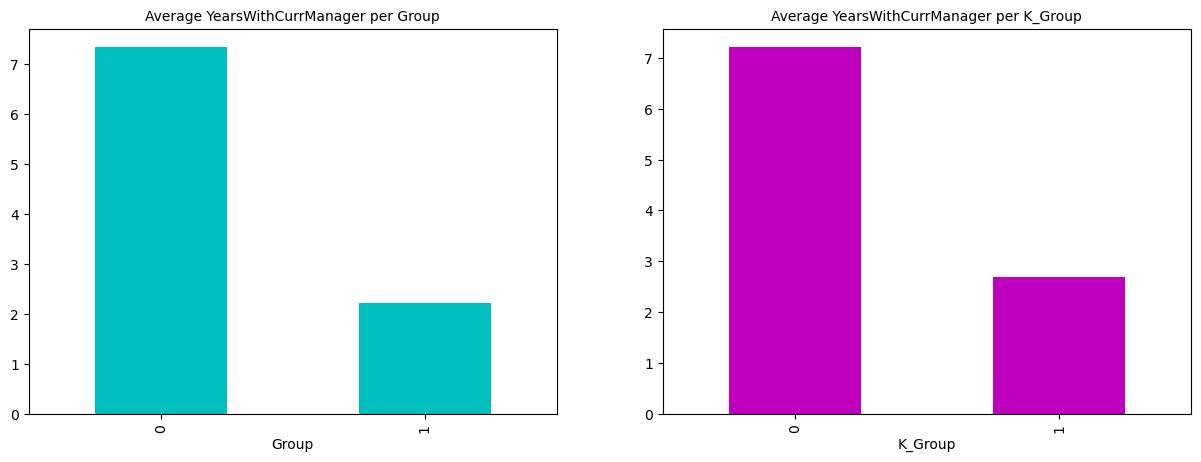

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Average YearsWithCurrManager per Group', fontsize = 10)
Bat = data_train.groupby('Group')['YearsWithCurrManager'].mean()
Bat.plot(kind = 'bar', color = 'c')

plt.subplot(1,2,2)
plt.title('Average YearsWithCurrManager per K_Group', fontsize = 10)
Cat = data_train.groupby('K_Group')['YearsWithCurrManager'].mean()
Cat.plot(kind = 'bar', color = 'm')
plt.savefig('Average YearsWithCurrManager per Group & Average YearsWithCurrManager per K_Group.png')

plt.show()

In [105]:
Raw_New_df = New_df.copy()

In [101]:
K_present_df = New_df.copy()

In [104]:
K_present_df.head()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition,K_Group,Group
0,41,5,2,2,5993,1,0,8,6,4,1,1,1
1,49,7,2,1,5130,0,1,10,10,7,0,0,0
2,37,0,1,2,2090,1,0,7,0,0,1,1,1
3,33,0,1,1,2909,1,0,8,8,7,0,1,1
4,27,2,1,1,3468,0,1,6,2,2,0,1,1


### Agglomerative Clustering Analysis

In [102]:
New_df.drop('K_Group', axis = 1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11356\1095542117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df.drop('K_Group', axis = 1, inplace=True)


In [103]:
New_df.head()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition,Group
0,41,5,2,2,5993,1,0,8,6,4,1,1
1,49,7,2,1,5130,0,1,10,10,7,0,0
2,37,0,1,2,2090,1,0,7,0,0,1,1
3,33,0,1,1,2909,1,0,8,8,7,0,1
4,27,2,1,1,3468,0,1,6,2,2,0,1


In [116]:
New_df.groupby('Group').mean()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
Group,,,,,,,,,,,
0,40.806216,7.336380,2.886654,1.043876,9477.257770,0.254113,0.840951,17.365631,12.074954,7.396709,0.016453
1,34.622969,2.218852,1.576381,1.128927,4515.624052,0.300108,0.765980,7.672806,4.005417,2.352113,0.247021


In [133]:
Agglomerative_Clustering = New_df.groupby('Group').mean()
Agglomerative_Clustering.to_csv('Agglomerative_Clustering.csv', index=False)

## Deductions from the Analysis of the Agglomerative Model prediction

#### The New_df.groupby('Group').mean() reveals the categories [no of clusters] which the average values of the features are grouped into, (basically binary{0,1}).
#### It can be seen in the table above, the distribution of the mean across each feature in the New_df dataframe. 
#### It can be said that the first category [0] is comprised of Employees on average who earn more monthly income, has spent more years in their current role, more years at the company and also more Total working years than the category [1] Employees
#### The category [0] Employees also are very much unlikely to be laid off as it can be seen due to its average value's proximity to zero (value =[0.016]), which represents (No Attrition), as opposed to the category [1] Employees (value = [0.25]).
#### A lot can be derived from this catergorization of the average values of the features, but the important ones have been said above. These are my deductions from the Agglomerative Clustering prediction.

### KMeans Clustering Analysis

In [119]:
K_present_df.drop('Group', axis=1, inplace=True)

In [121]:
K_present_df.head()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition,K_Group
0,41,5,2,2,5993,1,0,8,6,4,1,1
1,49,7,2,1,5130,0,1,10,10,7,0,0
2,37,0,1,2,2090,1,0,7,0,0,1,1
3,33,0,1,1,2909,1,0,8,8,7,0,1
4,27,2,1,1,3468,0,1,6,2,2,0,1


In [123]:
K_present_df.groupby('K_Group').mean()

,Age,YearsWithCurrManager,JobLevel,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
K_Group,,,,,,,,,,,
0,42.961290,7.210753,3.230108,0.993548,10892.419355,0.266667,0.870968,19.290323,12.746237,7.490323,0.077419
1,34.130348,2.694527,1.524378,1.145274,4265.677612,0.290547,0.758209,7.573134,4.353234,2.720398,0.200000


In [132]:
KMeans_Clustering =K_present_df.groupby('K_Group').mean()
KMeans_Clustering.to_csv('KMeans_Clustering.csv', index = False) 

## Deductions from the Analysis of the KMeans Model prediction

#### The New_df.groupby('Group').mean() reveals the categories [no of clusters] which the average values of the features are grouped into, (basically binary{0,1}).
#### It can be seen in the table above, the distribution of the mean across each feature in the New_df dataframe. 
#### It can be said that the first category [0] is comprised of Employees on average who earn more monthly income, has spent more years in their current role, more years at the company and also more Total working years than the category [1] Employees
#### The category [0] Employees also are very much unlikely to be laid off as it can be seen due to its average value's proximity to zero (value =[0.077]), which represents (No Attrition), as opposed to the category [1] Employees (value = [0.20]).
#### A lot can be derived from this catergorization of the average values of the features, but the important ones have been said above. These are my deductions from the Kmeans Clustering prediction.

### Comparative Analysis of Kmeans model prediction and Agglomerative model prediction

In [128]:
Kmeans_vs_Agglomerative = data_train[['K_Group','Group']]

In [129]:
Kmeans_vs_Agglomerative.head()

,K_Group,Group
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


### Visualization of the Kmeans model prediction vs Agglomerative model prediction 

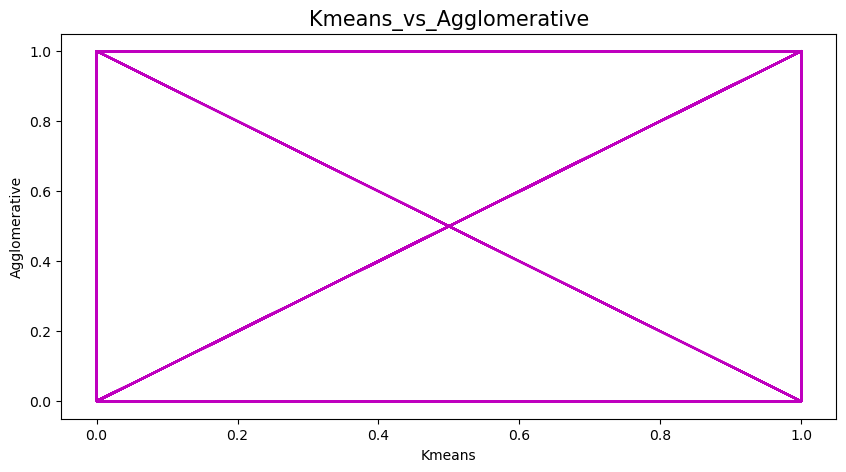

<Figure size 640x480 with 0 Axes>

In [125]:
plt.figure(figsize=(10,5))
plt.plot(K_present_df['K_Group'],New_df['Group'], color = 'm')
plt.title('Kmeans_vs_Agglomerative', fontsize = 15)
plt.xlabel('Kmeans')
plt.ylabel('Agglomerative')
plt.show()
plt.savefig('Kmeans_vs_Agglomerative.png')